# Plate 7
## Preprocessing

In [2]:
import pandas as pd
import numpy as np

def convert_time(time):
    # return time in hours and correct for day overflow (datetime object has attribute year only if it is more than 24h after start)
    '''Converts the data format into seconds'''
    h,m,s = (time.hour,time.minute,time.second)
    return (int(h) * 3600 + int(m) * 60 + int(s))/3600 + (24 if hasattr(time,"year") else 0)


def get_dataframe_from_xlsx(path):
    df = pd.read_excel(path,header=None)

    df_list = np.split(df, df[df.isnull().all(1)].index)
    df_list_new = []
    for i in range(len(df_list)):
        df = df_list[i]
        df.columns = df.iloc[0 if i == 0 else 1] #set header
        df = df.iloc[1 if i == 0 else 2:] #delete first row (header)
        df = df.set_index('Kinetic read') #set index
        df.index = df.index.map(convert_time) #convert datetime.time into seconds
        df = df[df.columns.dropna()] #remove empty columns
        df = df.dropna() #remove all empty lines
        df_list_new.append(df)
    return pd.concat(df_list_new,axis=1)

df = get_dataframe_from_xlsx('../data/202000814_iGEM2020-KO-Fitness-plate7.xlsx')
df.head()

,A1,B1,C1,D1,E1,F1,G1,H1,A2,B2,...,G11,H11,A12,B12,C12,D12,E12,F12,G12,H12
Kinetic read,,,,,,,,,,,,,,,,,,,,,
0.072778,0.114,0.116,0.137,0.121,0.12,0.123,0.122,0.119,0.12,0.119,...,0.114,0.117,0.113,0.114,0.115,0.117,0.098,0.095,0.113,0.112
0.156111,0.112,0.113,0.137,0.12,0.119,0.121,0.12,0.117,0.12,0.118,...,0.113,0.117,0.112,0.114,0.114,0.116,0.096,0.095,0.112,0.111
0.239444,0.112,0.112,0.136,0.118,0.118,0.123,0.118,0.117,0.119,0.117,...,0.113,0.117,0.112,0.113,0.114,0.115,0.096,0.094,0.111,0.111
0.322778,0.111,0.112,0.136,0.118,0.118,0.123,0.118,0.116,0.118,0.117,...,0.112,0.116,0.112,0.113,0.114,0.114,0.096,0.094,0.111,0.11
0.406111,0.111,0.112,0.135,0.117,0.118,0.123,0.117,0.116,0.117,0.116,...,0.112,0.116,0.112,0.113,0.113,0.114,0.096,0.094,0.11,0.11


## Plots

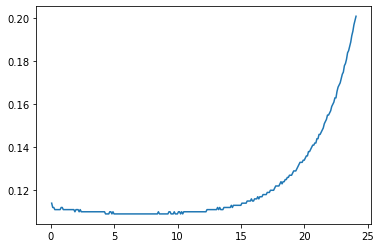

In [15]:
import matplotlib.pyplot as plt
plt.plot(df['A1'])
plt.show()

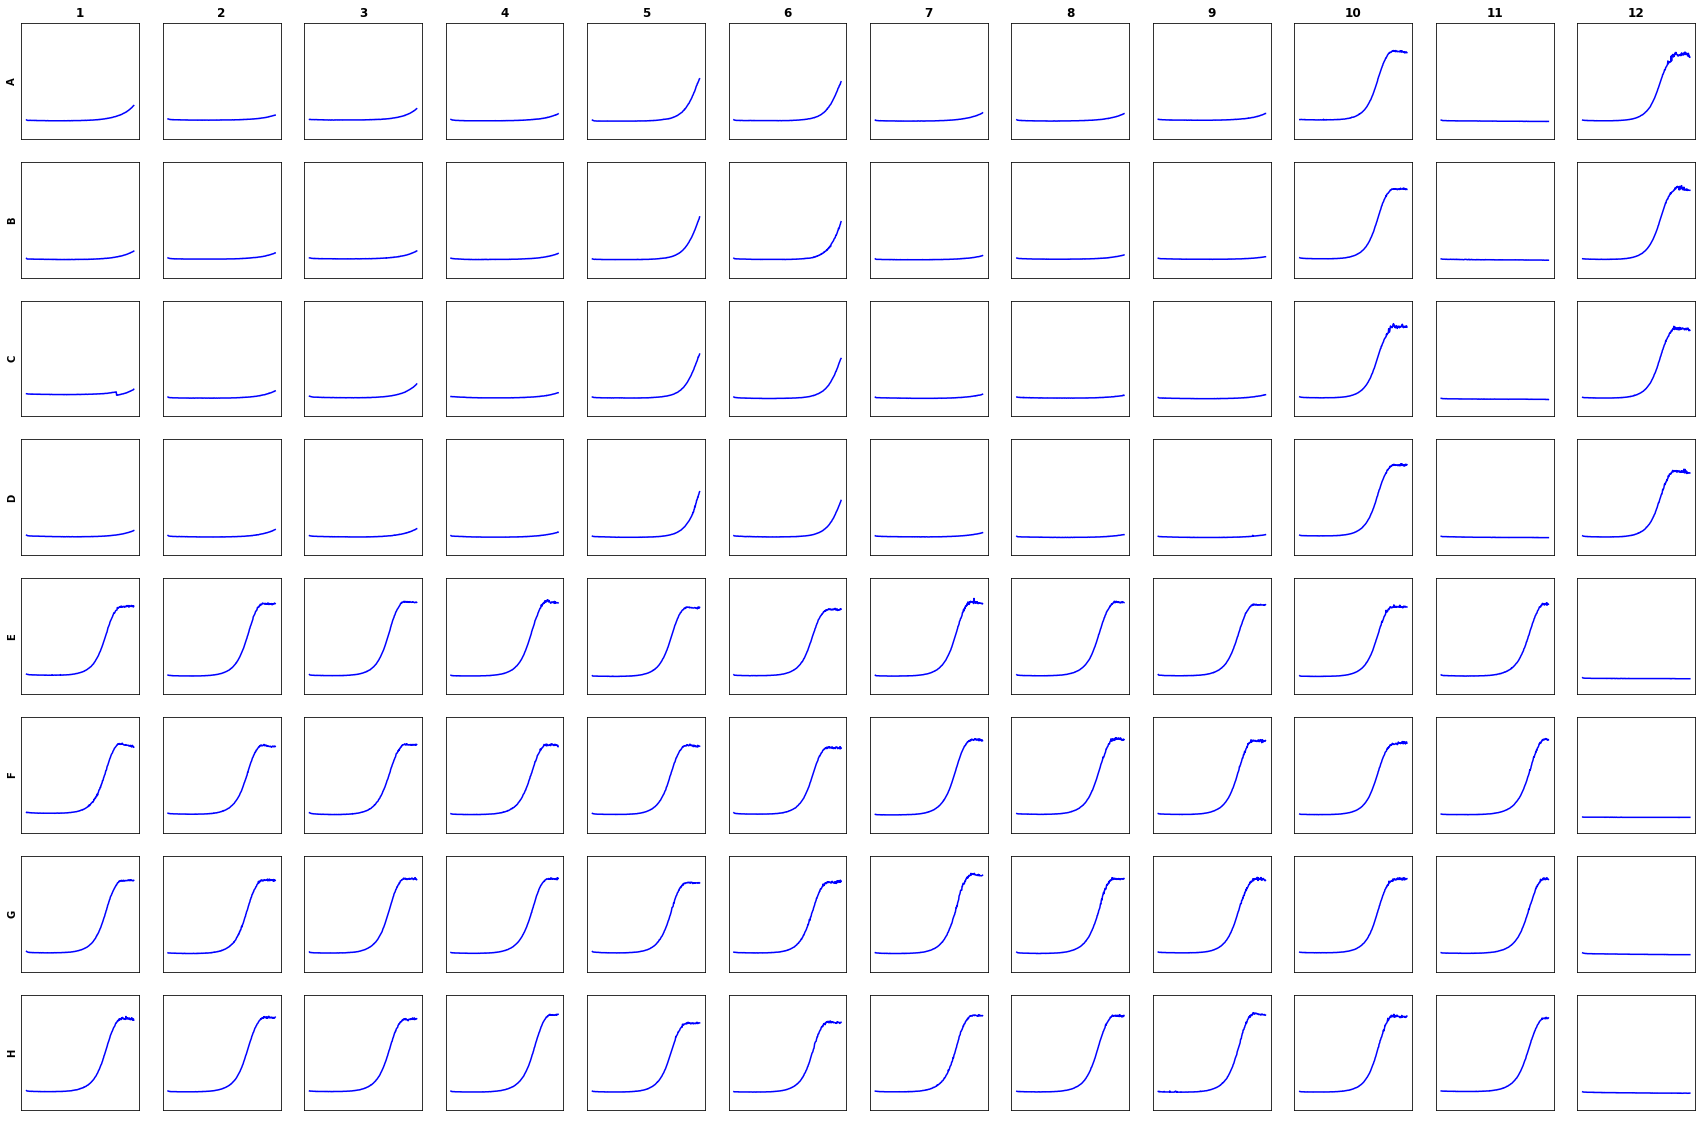

In [16]:
import matplotlib.pyplot as plt
import string

alph = string.ascii_uppercase
fig, axs = plt.subplots(8, 12)
fig.set_figheight(20)
fig.set_figwidth(30)
for i in range(8):
    axs[i,0].set_ylabel(alph[i],fontweight='bold')
    for j in range(12):
        plt.sca(axs[i,j])
        if(i==0):
            plt.title(j+1,fontweight='bold')
        y = df[alph[i]+str(j+1)]
        plt.plot(y,'b')
        plt.xticks([])
        plt.yticks([])
        axs[i,j].set_ylim([0, 0.7])
plt.show()

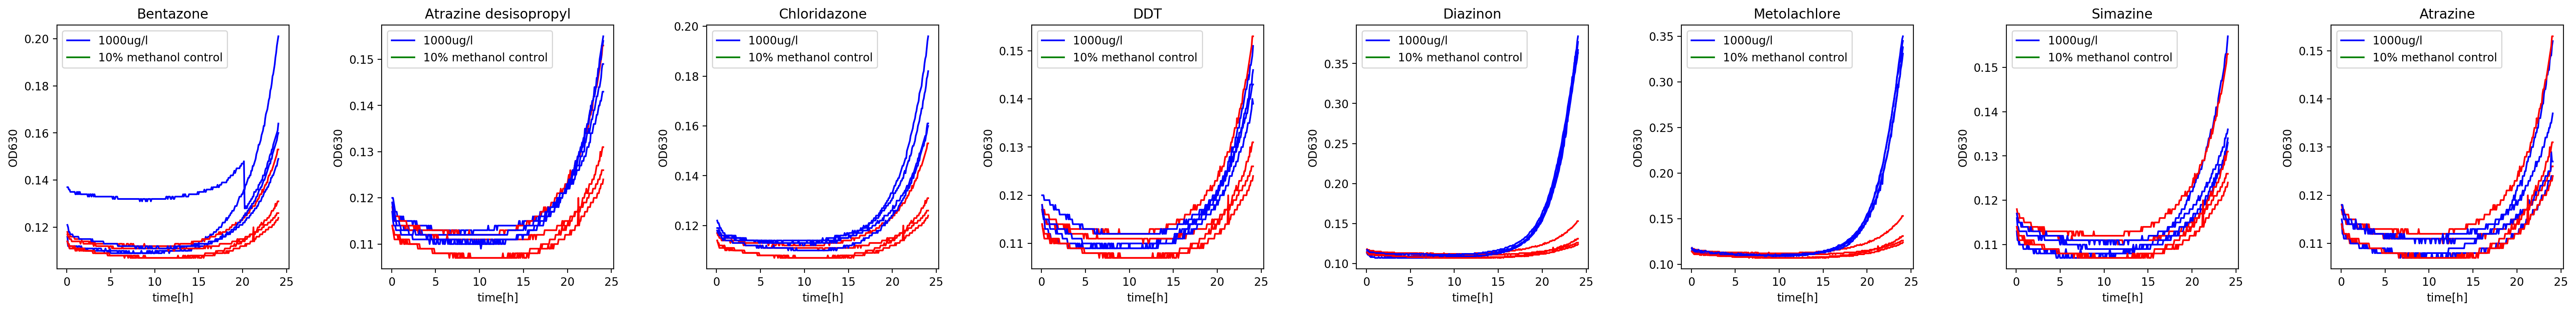

In [18]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200
import matplotlib.pyplot as plt
import string

alph = string.ascii_uppercase
pesticides = ['Bentazone','Atrazine desisopropyl','Chloridazone','DDT','Diazinon','Metolachlore','Simazine','Atrazine']
control = [['A12','B12','C12','D12'],['A9','B9','C9','D9'],['E9','F9','G9','H9'],['G12','H12']]
fig, axs = plt.subplots(1,len(pesticides))
fig.set_figheight(4)
fig.set_figwidth(40)
for k in range(len(pesticides)):
    plt.sca(axs[k])
    plt.ylabel('OD630')
    plt.xlabel('time[h]')
    plt.title(pesticides[k])
    for j in range(4):
        plt.plot(df[alph[j]+str(k+1)],'b')
        plt.plot(df[control[1][j]],'r')
    plt.legend(['1000ug/l','10% methanol control'])
    leg = axs[k].get_legend()
    leg.legendHandles[0].set_color('b')
    leg.legendHandles[1].set_color('g')
plt.subplots_adjust(wspace=0.4)
plt.show()

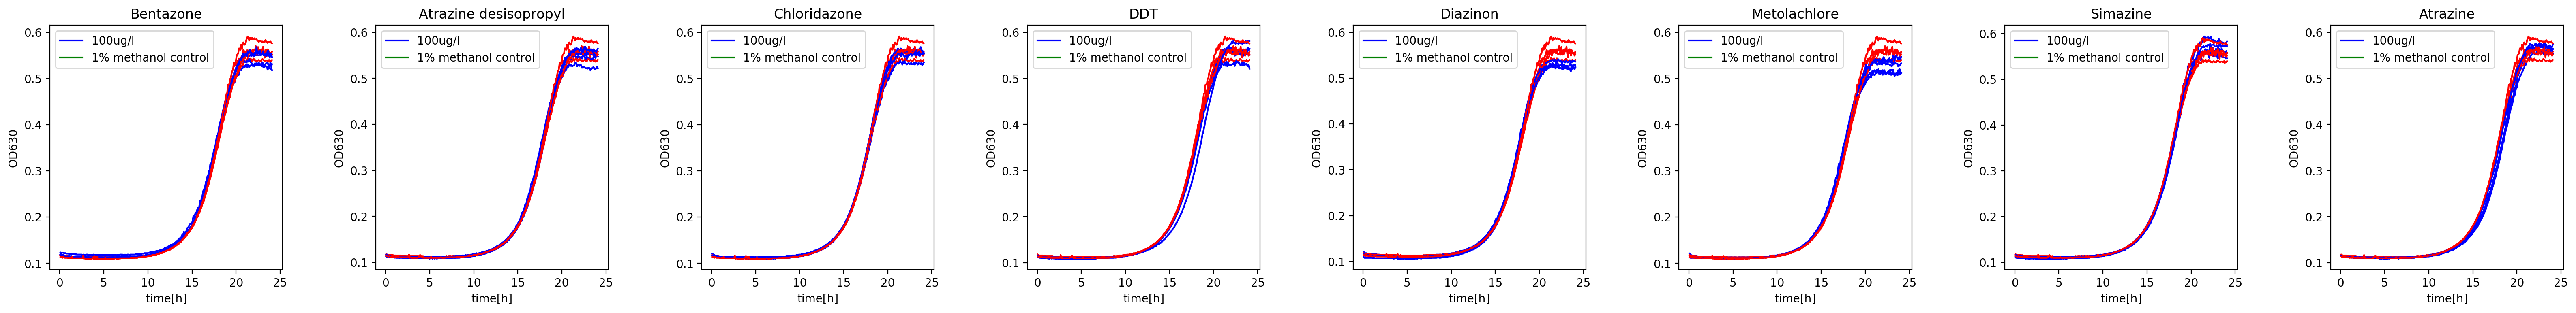

In [19]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200
import matplotlib.pyplot as plt
import string

alph = string.ascii_uppercase
pesticides = ['Bentazone','Atrazine desisopropyl','Chloridazone','DDT','Diazinon','Metolachlore','Simazine','Atrazine']
control = [['A12','B12','C12','D12'],['A9','B9','C9','D9'],['E9','F9','G9','H9'],['G12','H12']]
fig, axs = plt.subplots(1,len(pesticides))
fig.set_figheight(4)
fig.set_figwidth(40)
for k in range(len(pesticides)):
    plt.sca(axs[k])
    plt.ylabel('OD630')
    plt.xlabel('time[h]')
    plt.title(pesticides[k])
    for j in range(4):
        plt.plot(df[alph[j+4]+str(k+1)],'b')
        plt.plot(df[control[2][j]],'r')
    plt.legend(['100ug/l','1% methanol control'])
    leg = axs[k].get_legend()
    leg.legendHandles[0].set_color('b')
    leg.legendHandles[1].set_color('g')
plt.subplots_adjust(wspace=0.4)
plt.show()

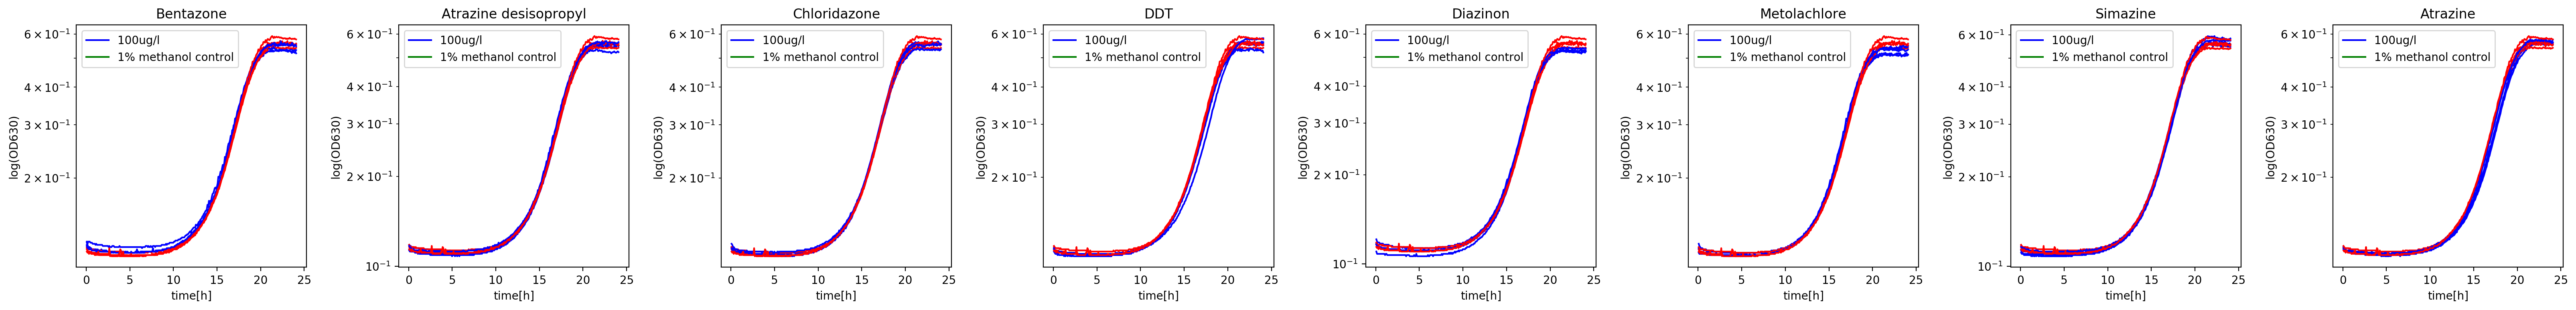

In [20]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200
import matplotlib.pyplot as plt
import string

alph = string.ascii_uppercase
pesticides = ['Bentazone','Atrazine desisopropyl','Chloridazone','DDT','Diazinon','Metolachlore','Simazine','Atrazine']
control = [['A12','B12','C12','D12'],['A9','B9','C9','D9'],['E9','F9','G9','H9'],['G12','H12']]
fig, axs = plt.subplots(1,len(pesticides))
fig.set_figheight(4)
fig.set_figwidth(40)
for k in range(len(pesticides)):
    plt.sca(axs[k])
    plt.ylabel('log(OD630)')
    plt.xlabel('time[h]')
    plt.title(pesticides[k])
    for j in range(4):
        plt.semilogy(df[alph[j+4]+str(k+1)],'b')
        plt.semilogy(df[control[2][j]],'r')
    plt.legend(['100ug/l','1% methanol control'])
    leg = axs[k].get_legend()
    leg.legendHandles[0].set_color('b')
    leg.legendHandles[1].set_color('g')
plt.subplots_adjust(wspace=0.4)
plt.show()

## Fit

In [6]:
from scipy.optimize import curve_fit
def logistic(x,x0,y0,k,L):
    '''Logistic function'''
    return L/(1+np.exp(-k*(x-x0))) + y0

def get_fit(df,col,init_vals):
    '''Fit the logistic model and get the best parameters'''
    t = np.array(df.index)
    od = np.array(df[col],dtype=float)
    try:
        best_vals, covar = curve_fit(logistic, t, od, p0=init_vals)
        return best_vals
    except:
        return [0,0,0,0]

In [7]:
import string

alph = string.ascii_uppercase
#estimating k for wildtype
k_control = []
for i in range(4):
    col = str(9)
    row = alph[i+4]
    fit = get_fit(df,(row+col),[12.5,0.3,1,0.8])
    k_control.append(fit[2])
k_control

[0.7387440741587863,
 0.7499309953700016,
 0.7240147347360247,
 0.7625109432672993]

In [9]:
from scipy.stats import ttest_ind
print('t-test (alpha=0.05) for the growth rate k at 100ug/l compared to methanol control (+ = significant difference in mean(k))')
pesticides = ['Bentazone','Atrazine desisoprpyl','Chloridazone','DDT','Diazinone','Metolachlore','Simazine','Atrazine']
for i in range(len(pesticides)):
    k = []
    for j in range(4):
        col = str(i+1)
        row = alph[j+4]
        fit = get_fit(df,(row+col),[12.5,0.3,1,0.8])
        k.append(fit[2])
    print(pesticides[i], '+' if ttest_ind(k_control,k).pvalue < 0.05 else '-')

t-test (alpha=0.05) for the growth rate k at 100ug/l compared to methanol control (+ = significant difference in mean(k))
Bentazone -
Atrazine desisoprpyl -
Chloridazone -
DDT -
Diazinone +
Metolachlore +
Simazine -
Atrazine -


[0.0325324405357289, 0.02918764527849005, 0.014396487901046306, 0.029777115442854996, 0.007639611190442874, 0.0210752461765793, 0.025289461775292565]


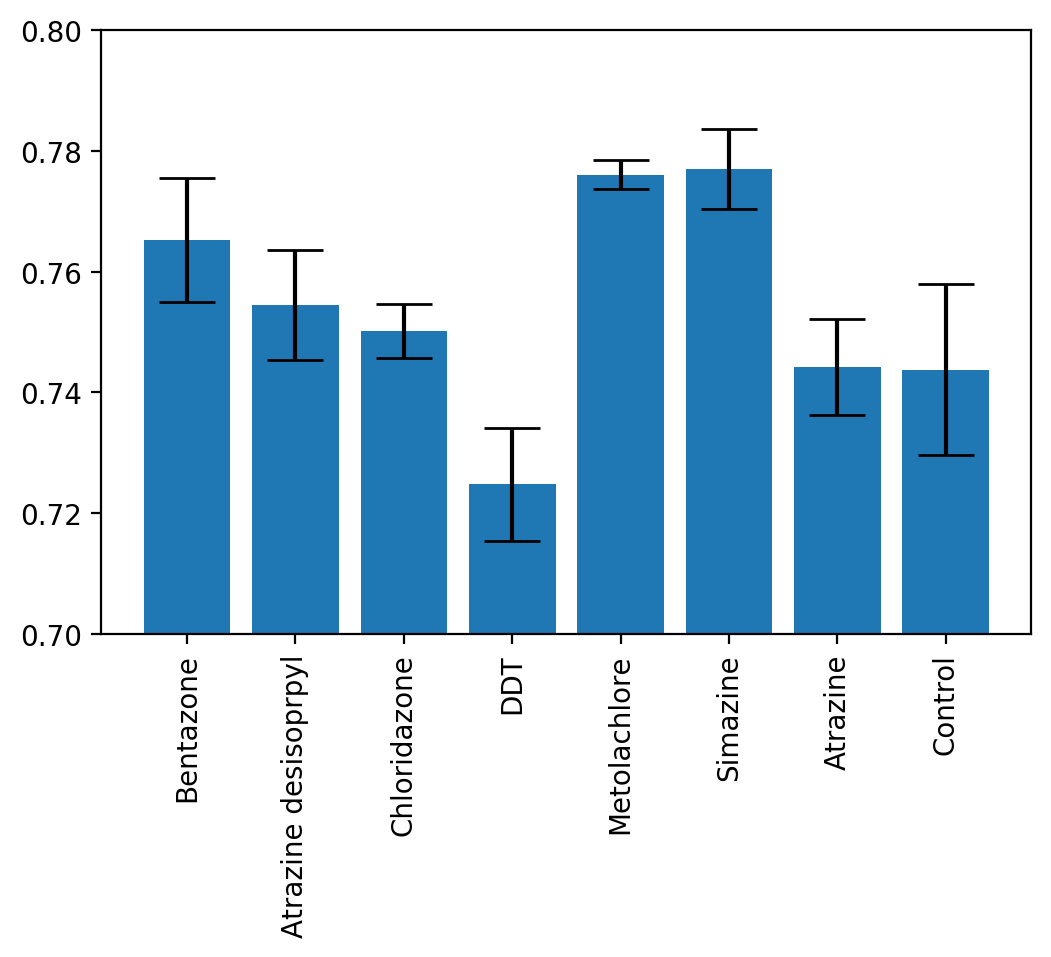

In [26]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200
from scipy.stats import t
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
means = []
stds = []
errs = []
x_pos = np.arange(len(pesticides)+1)
for i in range(len(pesticides)):
    k = []
    for j in range(4):
        col = str(i+1)
        row = alph[j+4]
        fit = get_fit(df,(row+col),[12.5,0.3,1,0.8])
        k.append(fit[2])
    means.append(np.mean(k))
    stds.append(np.std(k)/2)
    a,b = t.interval(0.95,3,np.mean(k),np.std(k)/2)
    errs.append((b-a)/2)
print(errs)
k_control = []
for i in range(4):
    col = str(9)
    row = alph[i+4]
    fit = get_fit(df,(row+col),[12.5,0.3,1,0.8])
    k_control.append(fit[2])
a,b = t.interval(0.95,3,np.mean(k_control),np.std(k_control)/2)
errs.append((b-a)/2)
means.append(np.mean(k_control))
stds.append(np.std(k_control))
ax.bar(x_pos,means,yerr=stds,capsize=10)
plt.ylim(0.7,0.8)
ax.set_xticks(x_pos)
ax.set_xticklabels(pesticides+['Control'])
plt.xticks(rotation=90)
plt.show()

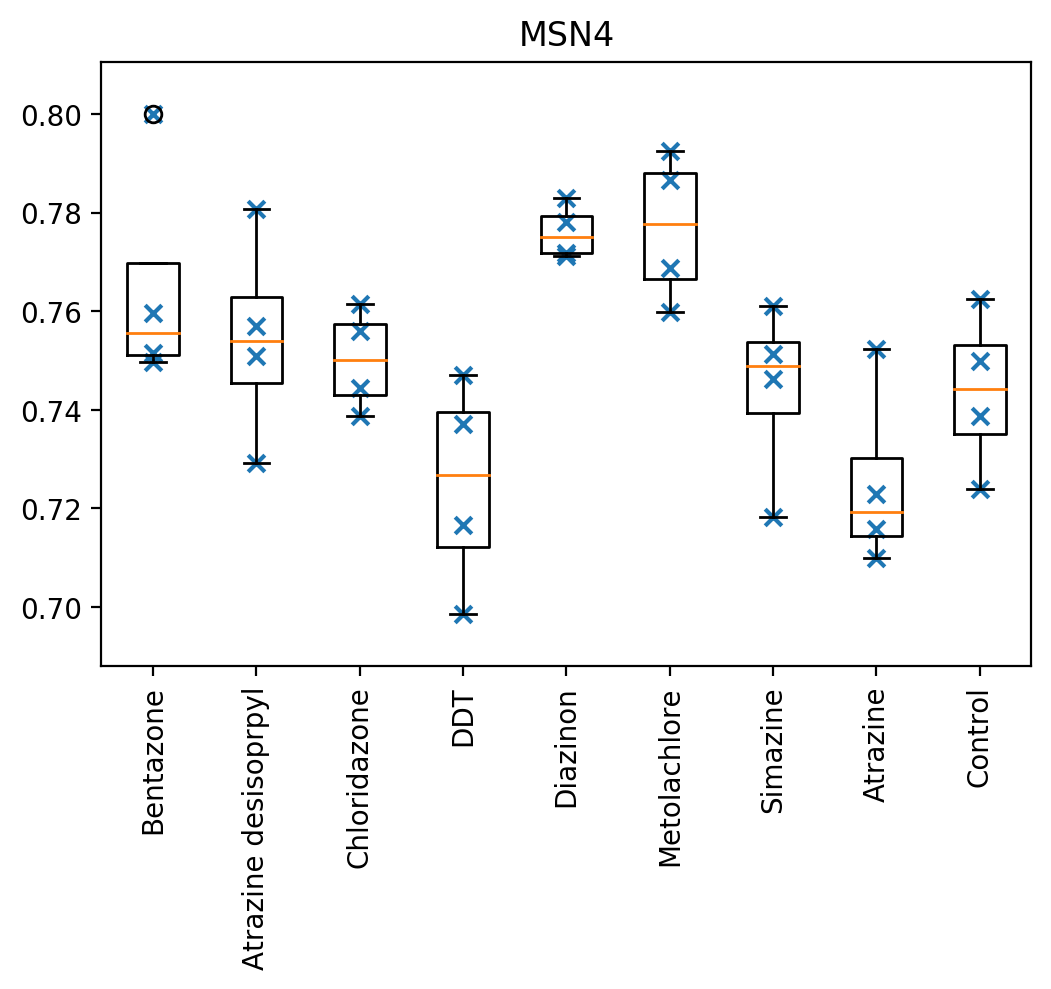

In [12]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200
import sys
from scipy.optimize import curve_fit
import string
import matplotlib.pyplot as plt

try: df
except: sys.exit('Data not loaded!')
pesticides = ['Bentazone','Atrazine desisoprpyl','Chloridazone','DDT','Diazinon','Metolachlore','Simazine','Atrazine','Control']
alph = string.ascii_uppercase

def logistic(x,x0,y0,k,L):
    '''Logistic function'''
    return L/(1+np.exp(-k*(x-x0))) + y0

def get_fit(df,col,init_vals):
    '''Fit the logistic model and get the best parameters'''
    t = np.array(df.index)
    od = np.array(df[col],dtype=float)
    try:
        best_vals, covar = curve_fit(logistic, t, od, p0=init_vals)
        return best_vals
    except RuntimeError:
        return [0,0,0,0]

def getK(i,l):
    k = []
    for j in range(4):
        col = str(i+1)
        row = alph[l+j]
        fit = get_fit(df,(row+col),[13,0.3,0.7,0.8])
        k.append(fit[2])
    return k

K = [getK(i,4) for i in range(len(pesticides))]
x = [i//4+1 for i in range(len(pesticides)*4)]
fig, ax = plt.subplots()
plt.scatter(x,K,marker='x')
plt.boxplot(K)
ax.set_xticklabels(pesticides)
plt.xticks(rotation=90)
plt.title('MSN4')
plt.show()